# Summarizing metrics from SDT horiz lines

Leanne Friedrich 5/4/23

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_under_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [3]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'underSDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolderR
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, spacing_adj, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnormd, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink_Ca, ink_CaInv, ink_diluent, ink

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
dw/dt,dXdt_w1o,dXdt_w2o,dXdt_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
dd/dt,dXdt_d1o,dXdt_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


In [99]:
ms.keyTableVar('meanT')

,1,2,3
wp,,,
wo,meanT_w1o,meanT_w2o,meanT_w3o
dw/dt,dmeanTdt_w1o,dmeanTdt_w2o,dmeanTdt_w3o
wrelax,,,
write,,delta_meanT_write2,
dp,,,
do,meanT_d1o,meanT_d2o,
dd/dt,dmeanTdt_d1o,dmeanTdt_d2o,
drelax,,,
disturb,delta_meanT_disturb1,delta_meanT_disturb2,


In [5]:
ms.numericDepVars()

['yf_w1p',
 'dy0l_w1p',
 'dyfl_w1p',
 'dyflr_w1p',
 'segments_w1o',
 'y0_w1o',
 'yf_w1o',
 'w_w1o',
 'wn_w1o',
 'h_w1o',
 'yc_w1o',
 'roughness_w1o',
 'emptiness_w1o',
 'meanT_w1o',
 'stdevT_w1o',
 'minmaxT_w1o',
 'dsegmentsdt_w1o',
 'dy0dt_w1o',
 'dyfdt_w1o',
 'dwdt_w1o',
 'dwndt_w1o',
 'dhdt_w1o',
 'dycdt_w1o',
 'droughnessdt_w1o',
 'demptinessdt_w1o',
 'dmeanTdt_w1o',
 'dstdevTdt_w1o',
 'dminmaxTdt_w1o',
 'yf_d1p',
 'segments_d1p',
 'roughness_d1p',
 'emptiness_d1p',
 'dy0l_d1p',
 'dy0lr_d1p',
 'dyfl_d1p',
 'dyflr_d1p',
 'space_l_d1p',
 'space_b_d1p',
 'segments_d1o',
 'y0_d1o',
 'yf_d1o',
 'w_d1o',
 'wn_d1o',
 'h_d1o',
 'yc_d1o',
 'roughness_d1o',
 'emptiness_d1o',
 'meanT_d1o',
 'stdevT_d1o',
 'minmaxT_d1o',
 'dsegmentsdt_d1o',
 'dy0dt_d1o',
 'dyfdt_d1o',
 'dwdt_d1o',
 'dwndt_d1o',
 'dhdt_d1o',
 'dycdt_d1o',
 'droughnessdt_d1o',
 'demptinessdt_d1o',
 'dmeanTdt_d1o',
 'dstdevTdt_d1o',
 'dminmaxTdt_d1o',
 'delta_yf_w1relax',
 'delta_yf_d1relax',
 'delta_segments_disturb1',
 'delta_y

In [18]:
ms.ss[['dy0l_w1p', 'segments_d1o']].dropna()

,dy0l_w1p,segments_d1o
5,1.18e+00,1.0
19,1.10e+00,1.0
20,1.08e+00,1.0
57,1.04e+00,1.0
72,-3.90e-01,1.0
73,1.04e+00,1.0
89,-4.20e-01,1.0
90,1.14e+00,1.0
92,-3.36e-01,1.0
94,1.11e+00,1.0


In [31]:
ms.depCorrelations(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'UnderSDTCorrs.csv'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\UnderSDTCorrs.csv


In [24]:
ms.depCor[abs(ms.depCor.spearman_corr)>0.9]

,spearman_corr,spearman_p,var1,var2
6181,-0.93,1.64e-100,dy0l_d1p,space_l_d1p
21688,0.98,9.48e-165,delta_y0_disturb2,delta_h_disturb2
23055,0.94,3.06e-116,stdevT_w3o,minmaxT_w3o
23403,0.92,1.87e-99,delta_y0_write3,delta_h_write3


# plots

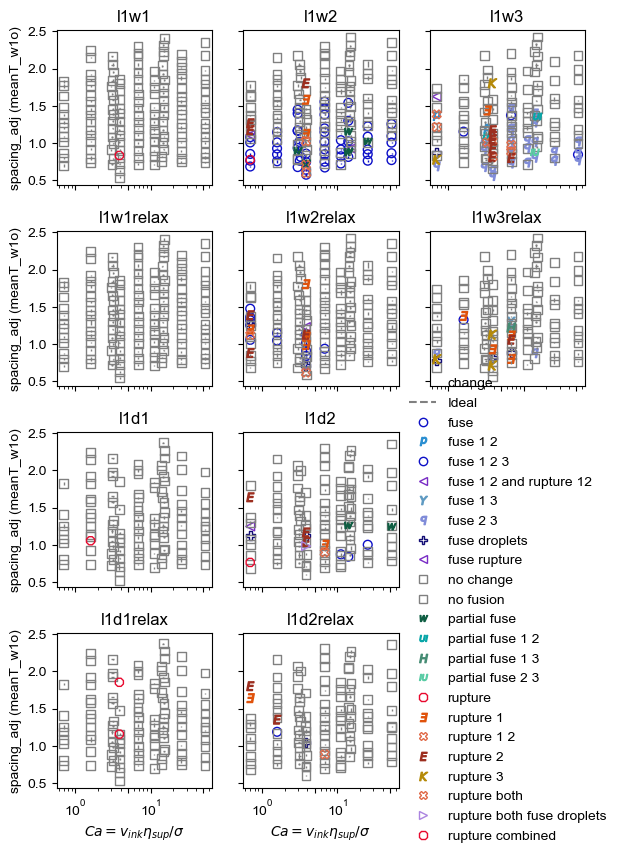

In [104]:
cvl = mp.qualityScatter(ms, ms.ss, xvar='int_Ca', yvar='spacing_adj', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook')

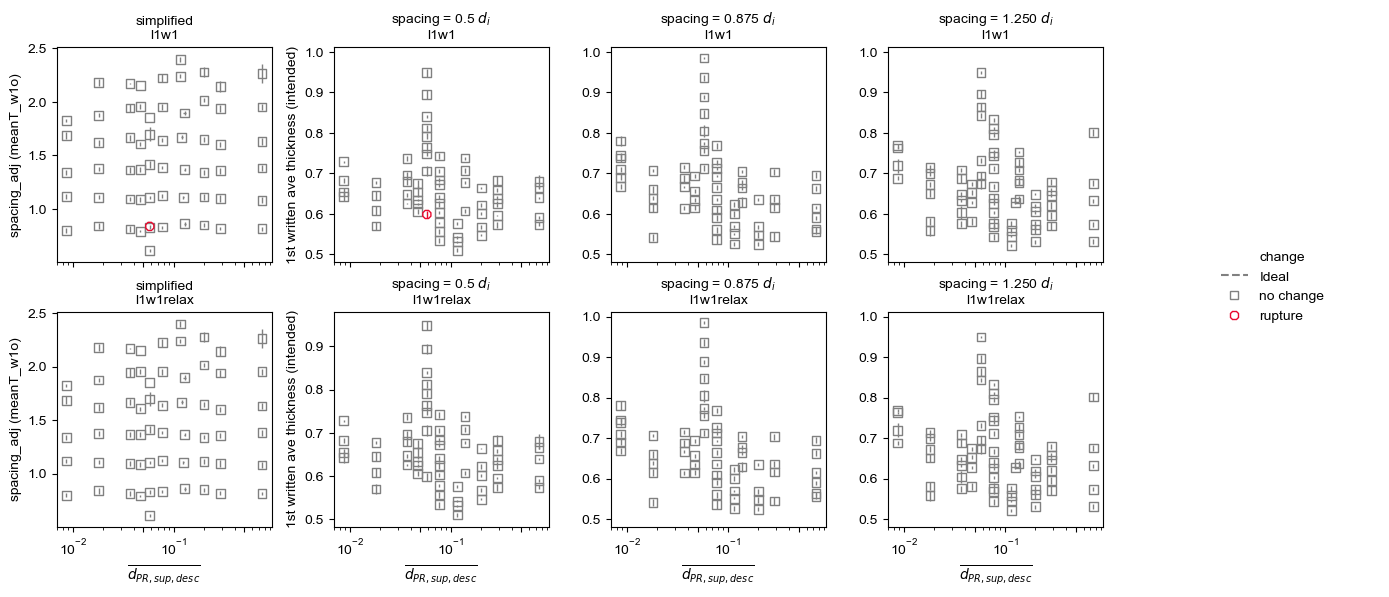

In [54]:
cvlw1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='meanT_w1o', cvar0='l1w1', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook', figsize=(14,6))

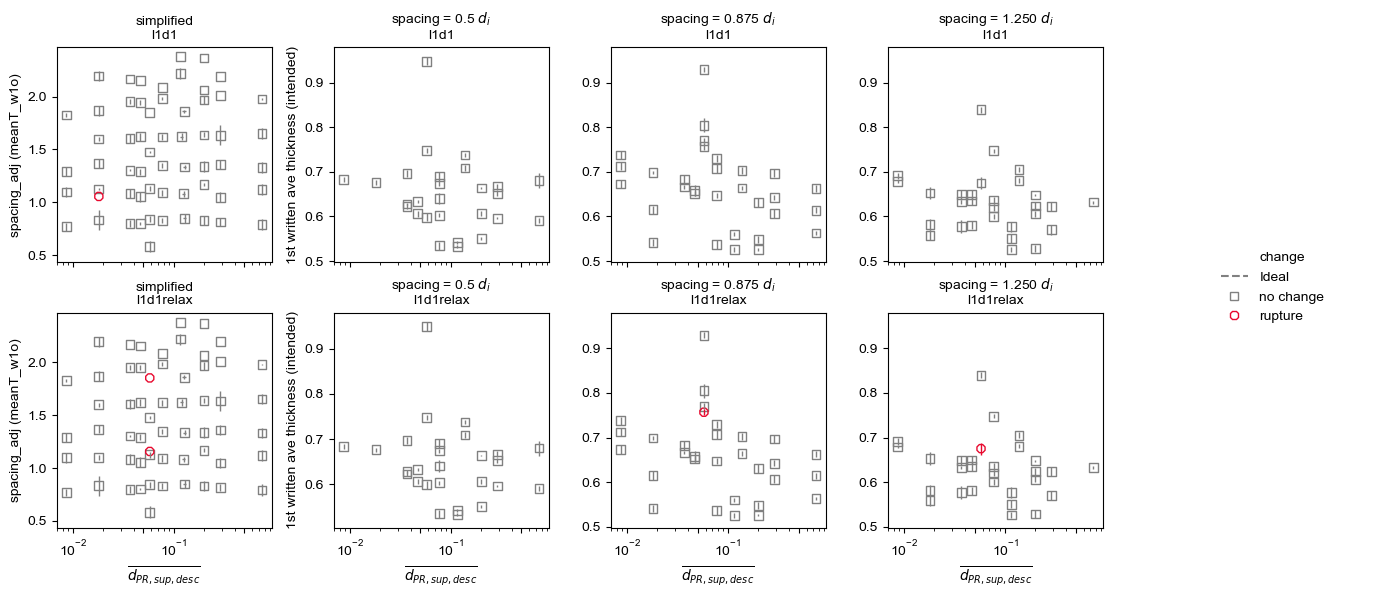

In [53]:
cvld1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='meanT_w1o', cvar0='l1d1', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook', figsize=(14,6))

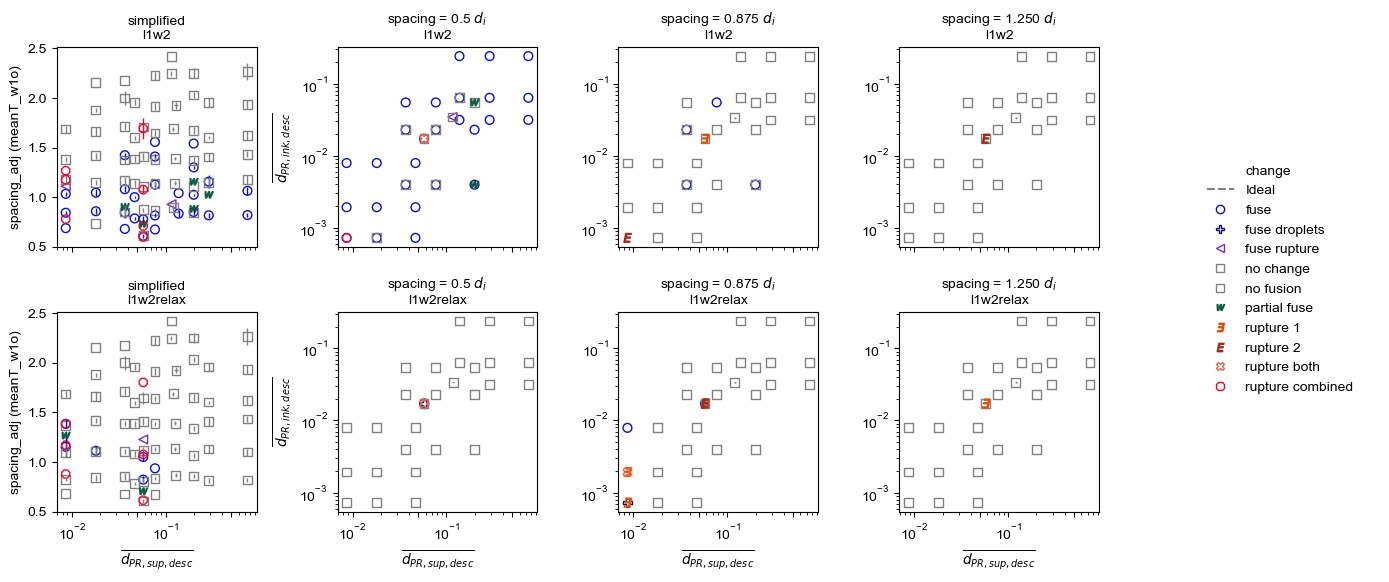

In [56]:
cvlw2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1w2', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

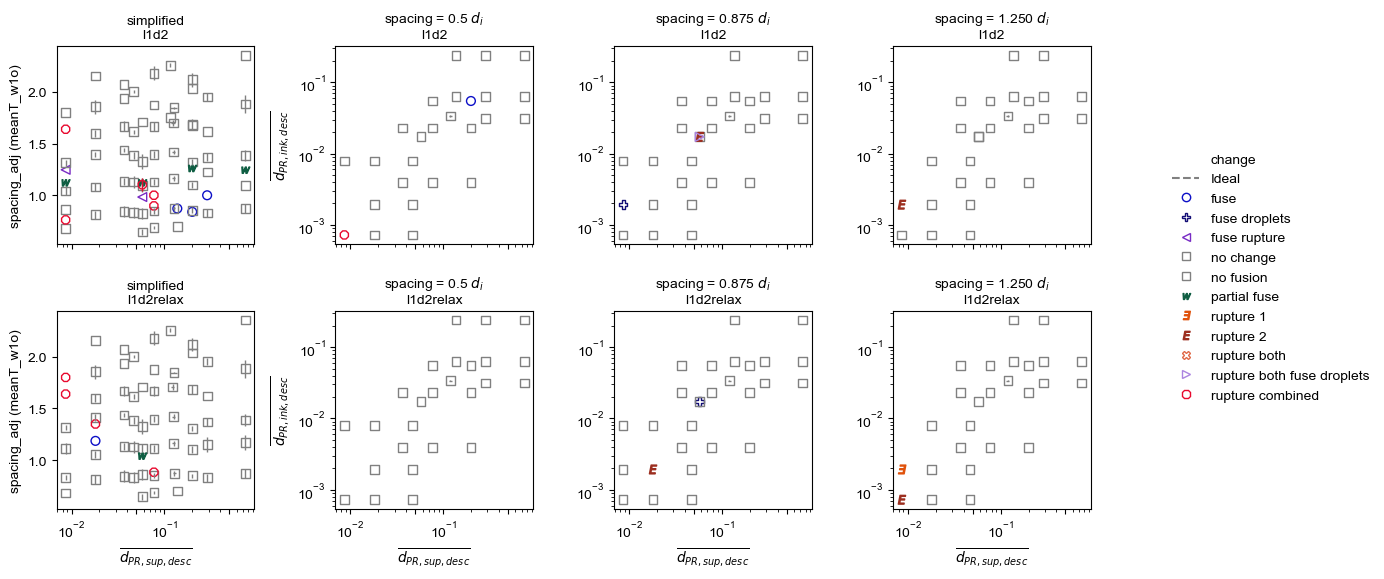

In [29]:
cvld2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1d2', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

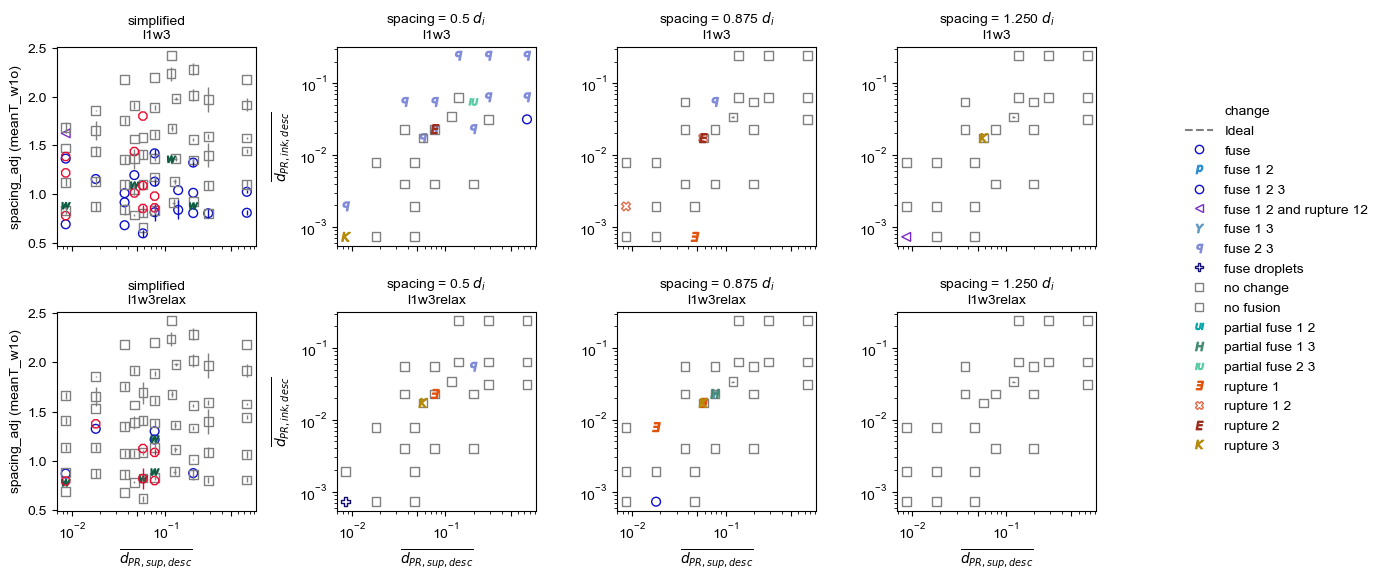

In [30]:
cvlw3 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1w3', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

In [192]:
import numpy as np

In [215]:
cvlw3i.ss.l1w2w3.unique()

array([nan, 'fuse last', 'fuse only 1st', 'rupture 2 step', 'fuse 1 2',
       'no fusion', 'fuse 1 2 3', 'rupture 1 2', 'partial fuse 1 2',
       'fuse droplets', 'rupture 1st', 'fuse 1 2 and rupture 12',
       'rupture 1', 'partial fuse only 1st', 'partial fuse last',
       'fuse 2 3', 'rupture 2', 'fuse rupture'], dtype=object)

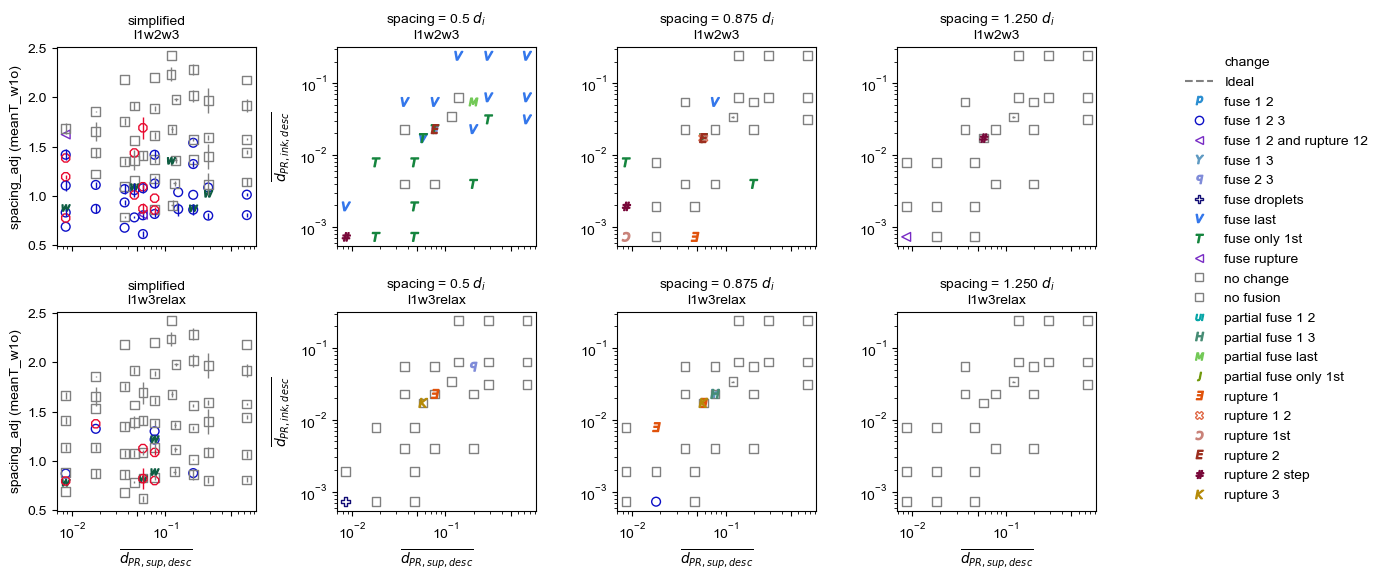

In [217]:
cvlw3i = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1w2w3', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

In [240]:
ms.ss.l1w2.unique()

array([nan])

In [6]:
ms.ss[(ms.ss.l1w2=='rupture 2')]

,printFolderR,sup_Ca,ink_Ca,sup_dnorma,sup_dnormd,ink_dnorma,ink_dnormd,sup_We,ink_We,sup_Oh,...,l0w2,l0w2relax,l0d2,l0d2relax,l2w1,l2w1relax,l2w2,l2w2relax,l2d2,l2d2relax
116,SDT\PDMSS\I_PDMSS7.5_S_3.00\I_PDMSS7.5_S_3.00_...,0.70,0.24,0.41,8.64e-03,0.03,7.24e-04,2.78e-03,1.79e-03,13.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,SDT\PDMSS\I_PDMSS7.5_S_3.00\I_PDMSS7.5_S_3.00_...,0.70,0.24,0.41,8.64e-03,0.03,7.24e-04,2.78e-03,1.79e-03,13.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,SDT\P_vs\8_3.50\vsweep_231019\disturbUnder_3_1...,6.82,3.18,1.40,5.78e-02,0.29,1.72e-02,3.63e-02,7.63e-03,35.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ms.openFolder(116)

In [226]:
ms.ss['zdepth'] = [int(round(x['zdepth'])) for i,x in ms.ss.iterrows()]

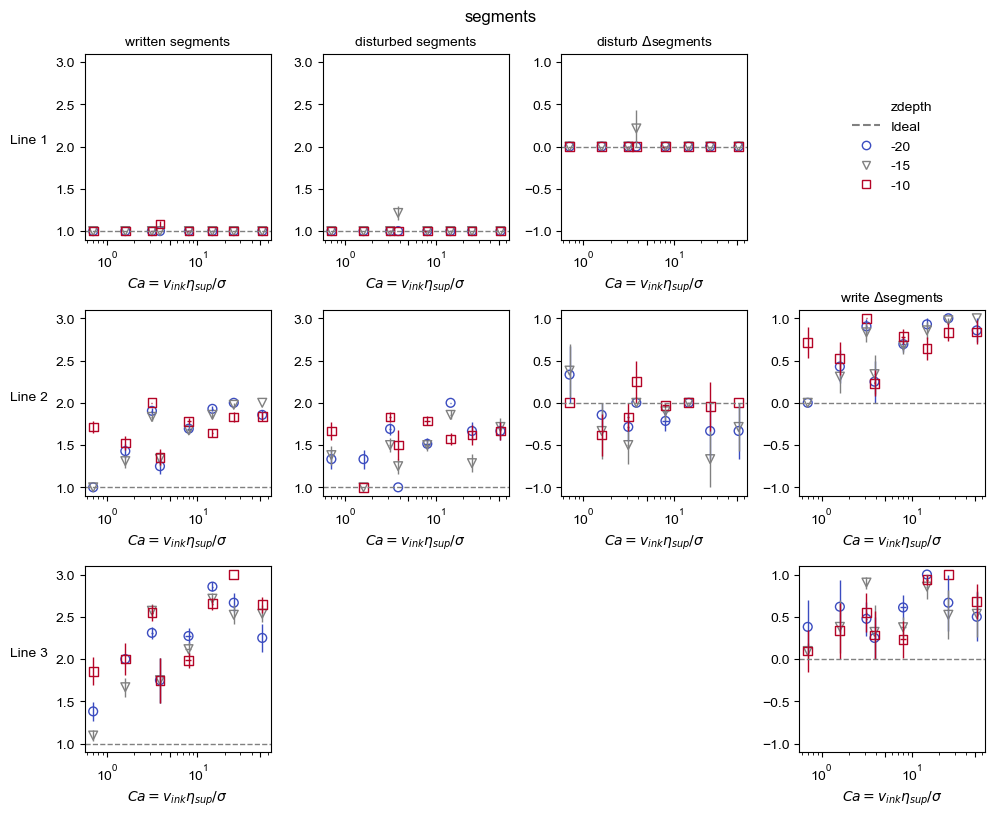

In [237]:
yvl = mp.yvarlines(ms, ms.ss[ms.ss.spacing==1.25], xvar='int_Ca', yvar='segments', cvar='zdepth', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

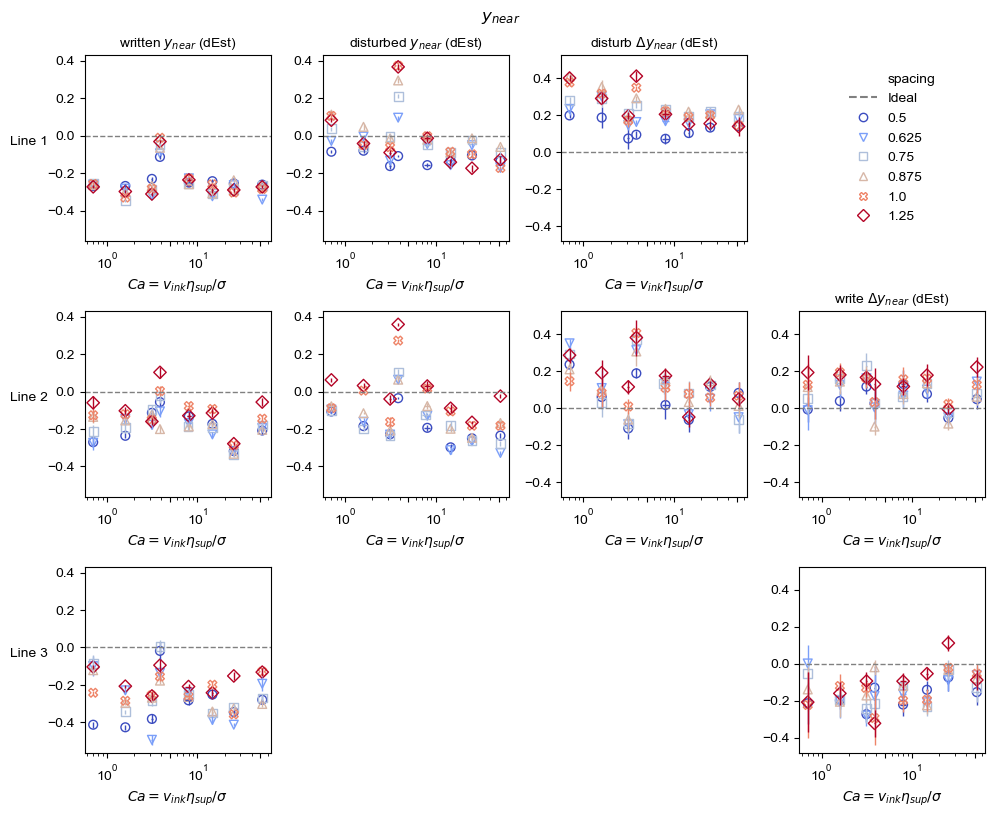

In [187]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='y0', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

In [4]:
ms.reduceRows('delta_wn_disturb1', yvarmax=-0.3);

C:\Users\lmf1\Miniconda3\lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,ink_shortname,sup_shortname,int_Ca,spacing,delta_wn_disturb1
107,PDMSS7.5,3.0,0.70,0.50,-0.40
71,PDMSS12.5,3.5,1.59,0.50,-0.36
53,PDMSS12.5,3.0,0.70,0.50,-0.34
108,PDMSS7.5,3.0,0.70,0.62,-0.33


In [67]:
ms.reduceRows('delta_wn_write3', yvarmin=0);

,ink_shortname,sup_shortname,int_Ca,spacing,delta_wn_write3
671,PDMSS8-S85-0.05,3.5,15.23,0.75,1.68e-04
315,PDMSS9-S20-0.5,4.0,52.38,0.62,7.55e-04
657,PDMSS8-S85-0.05,3.5,6.82,0.62,7.55e-04
662,PDMSS8-S85-0.05,3.5,3.87,0.62,2.46e-03
709,PDMSS8-S85-0.05,3.5,6.84,1.25,2.68e-03
646,PDMSS8-S85-0.05,3.5,3.86,0.50,2.68e-03
695,PDMSS8-S85-0.05,3.5,15.23,1.00,2.93e-03
453,PDMSS8-S85-0.05,3.0,2.98,1.25,3.19e-03
301,PDMSS9-S20-0.5,3.5,25.35,1.25,4.69e-03
656,PDMSS8-S85-0.05,3.5,15.18,0.62,5.62e-03


In [5]:
ms.openFolder(108)

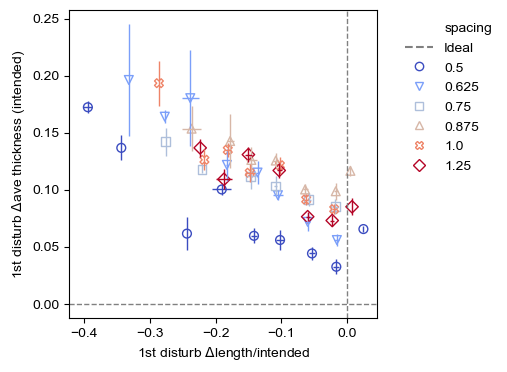

In [175]:
xvar = 'delta_wn_disturb1'
yvar = 'delta_meanT_disturb1'
cvar = 'spacing'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=False
                    , logy=False, dx=0.1, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar), xideal=me.ideals().yideal(xvar), legendloc='right')
p2.fig

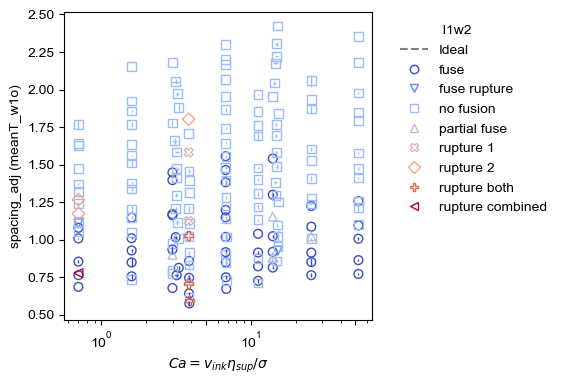

In [ ]:
xvar = 'int_Ca'
yvar = 'spacing_adj'
cvar = 'l1w2'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True
                    , logy=False, dx=0.05, dy=0.05, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar), legendloc='right')
p2.fig

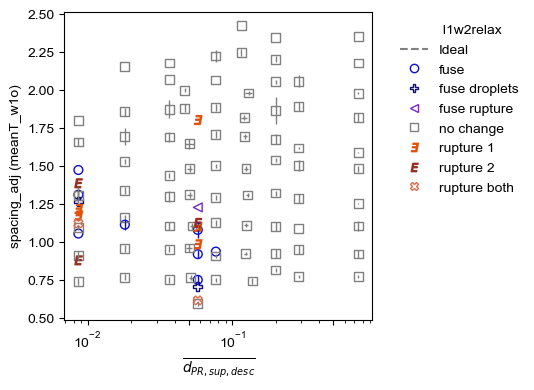

In [ ]:
xvar = 'sup_dnormd'
yvar = 'spacing_adj'
cvar = 'l1w2relax'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True
                    , logy=False, dx=0.1, dy=0.1, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar), legendloc='right')
p2.fig

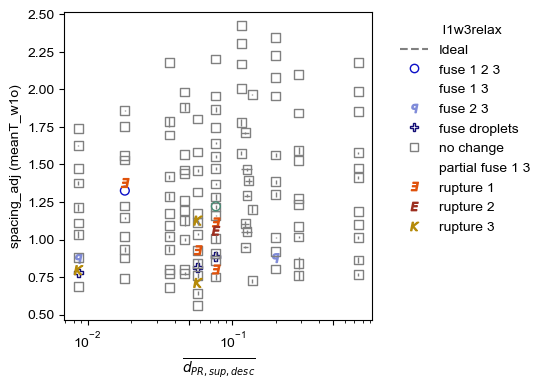

In [ ]:
xvar = 'sup_dnormd'
yvar = 'spacing_adj'
cvar = 'l1w3relax'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True
                    , logy=False, dx=0.05, dy=0.05, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar), legendloc='right')
p2.fig

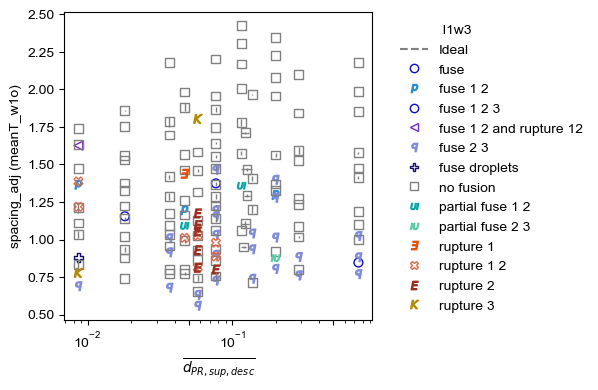

In [ ]:
xvar = 'sup_dnormd'
yvar = 'spacing_adj'
cvar = 'l1w3'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True
                    , logy=False, dx=0.05, dy=0.05, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar), legendloc='right')
p2.fig

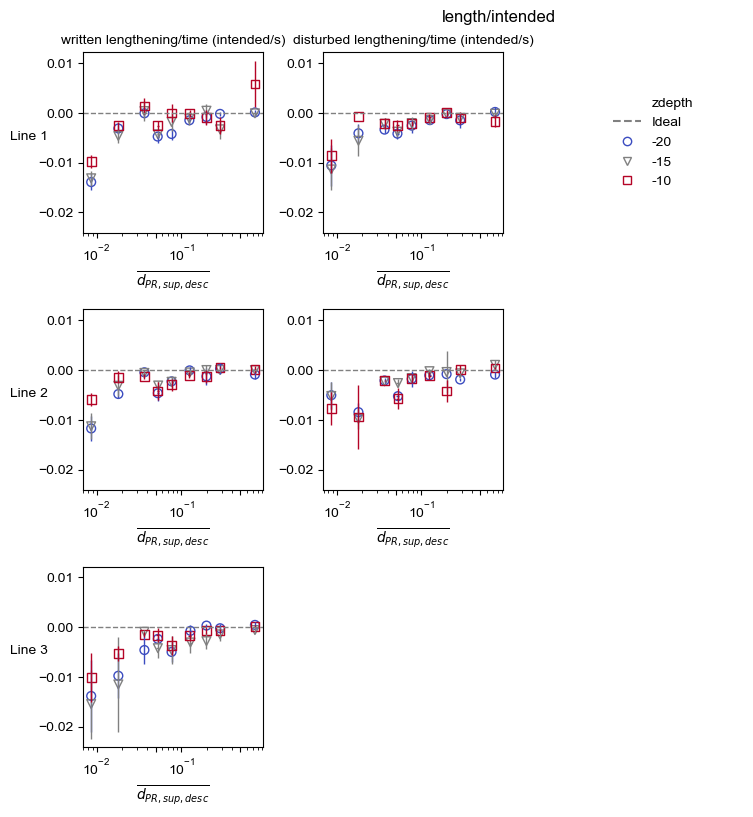

In [231]:
yvl = mp.yvarlines(ms, ms.ss[ms.ss.spacing==0.5], xvar='sup_dnormd', yvar='wn', cvar='zdepth', llist=[1, 2, 3]
             , plist=['dwdt', 'dddt', 'wp', 'dp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.1)
yvl.fig

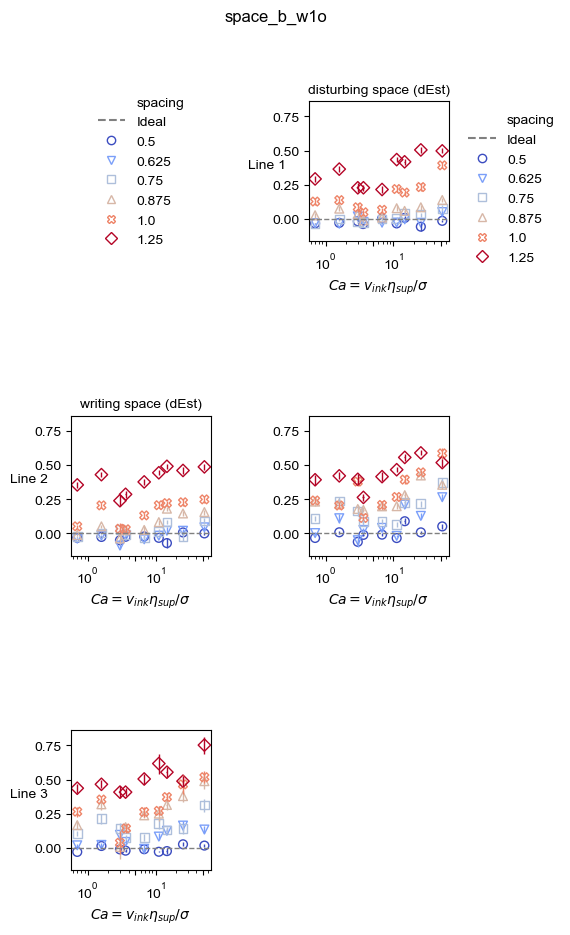

In [163]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='space_b', cvar='spacing', llist=[1, 2, 3]
             , plist=['wp', 'dp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.1)
yvl.fig

In [50]:
ms.reduceRows('dwndt_w2o', ms.ss.sup_Oh>20, ms.ss.sup_Oh<40, ms.ss.spacing<1, yvarmax=-0.005);

C:\Users\lmf1\Miniconda3\lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,ink_shortname,sup_shortname,int_Ca,spacing,dwndt_w2o
580,PDMSS8-S85-0.05,3.5,3.83,0.62,-4.56e-02
664,PDMSS8-S85-0.05,3.5,3.83,0.75,-4.35e-02
676,PDMSS8-S85-0.05,3.5,3.83,0.88,-3.38e-02
592,PDMSS8-S85-0.05,3.5,3.83,0.75,-3.32e-02
138,PDMSS7.5,3.5,1.59,0.62,-2.58e-02
139,PDMSS7.5,3.5,1.59,0.75,-1.84e-02
652,PDMSS8-S85-0.05,3.5,3.83,0.62,-1.72e-02
640,PDMSS8-S85-0.05,3.5,3.83,0.50,-1.46e-02
133,PDMSS7.5,3.5,1.59,0.75,-1.46e-02
86,PDMSS12.5,3.5,1.59,0.88,-1.21e-02


In [23]:
ms.ss.loc[57].printFolderR

'SDT\\PDMSS\\I_PDMSS12.5_S_3.00\\I_PDMSS12.5_S_3.00_230920\\disturbUnder_1_1.000'

In [58]:
ms.openFolder(139)

# export plots

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\shrinkage_HIP.png and .svg


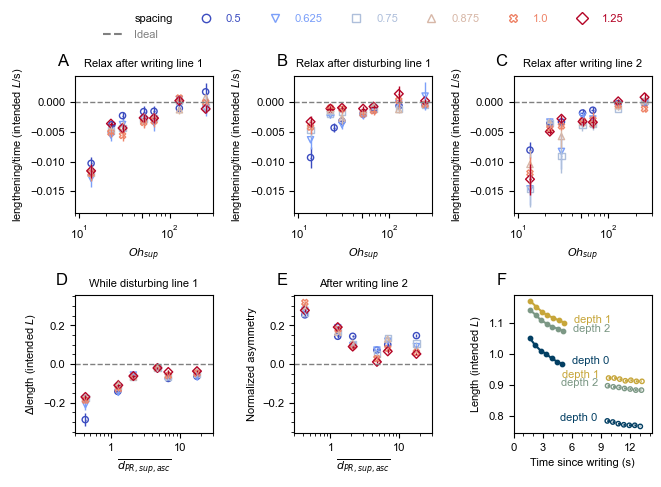

In [48]:
yvl = mp.shrinkagePlot(ms, r'SDT\\PDMSS\\I_PDMSS12.5_S_3.00\\I_PDMSS12.5_S_3.00_230920\\disturbUnder_1_1.000', export=True)
yvl.fig

# export regressions

In [13]:
def exportRegression(var, **kwargs) -> None:
    mp.regressionTableSDT(ms, ms.ss, var, logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, tag='HIP', exportFolder=os.path.join(cfg.path.fig, 'SDT'))

In [15]:
exportRegression('dwndt_w1o')
exportRegression('delta_wn_disturb1')
exportRegression('dwndt_d1o')
exportRegression('delta_wn_write2')
exportRegression('dwndt_w2o')

exportRegression('delta_wn_disturb2')
exportRegression('dwndt_d2o')
exportRegression('delta_wn_write3')
exportRegression('dwndt_w3o')
exportRegression('ldiff_w2o')
exportRegression('ldiff_w3o')

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w1o_HIP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w1o_HIP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\dwndt_w1o_HIP_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_disturb1_HIP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_disturb1_HIP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\delta_wn_disturb1_HIP_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_d1o_HIP_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_d1o_HIP_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/

## wn

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w1o_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w1o_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\dwndt_w1o_Reg.png and .svg


,variable,Spearman coeff,Spearman p
0,$Ca$,0.52,9.2e-50
1,$\overline{d_{PR.sup.asc}}$,0.57,5.7e-63
2,$\overline{d_{PR.sup.desc}}$,0.54,1.1e-54
3,$Oh_{sup}$,0.57,2.5e-62
4,$Oh_{ink}\times Oh_{sup}$,0.55,1.7e-58


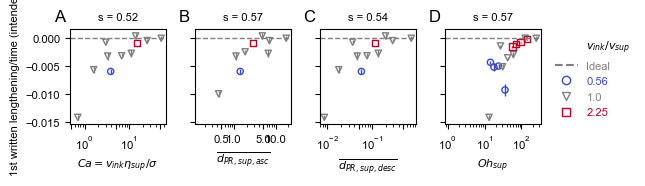

In [8]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,0.53,1.3e-18
1,$\overline{d_{PR.sup.asc}}$,0.61,1.1e-25
2,$\overline{d_{PR.sup.desc}}$,0.57,1.0e-21
3,$\overline{d_{PR.ink.desc}}\times \overline{d_...,0.54,4.7e-19
4,$Oh_{sup}$,0.53,1.2e-18
5,$Oh_{ink}\times Oh_{sup}$,0.57,6.3e-22


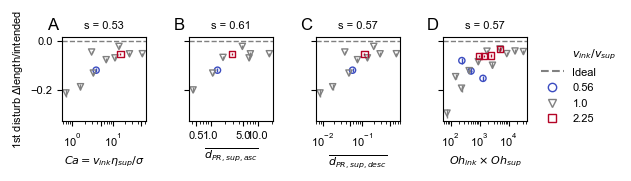

In [114]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_d1oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_d1oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dwndt_d1oReg.png and .svg


,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,0.51,8.7e-17


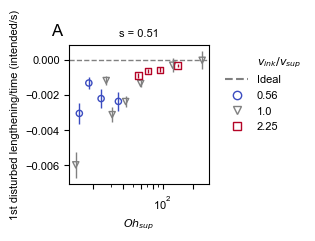

In [62]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_d1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w2oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w2oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dwndt_w2oReg.png and .svg


,variable,Spearman coeff,Spearman p
0,$Ca$,0.54,2.8e-37
1,$\overline{d_{PR.sup.asc}}$,0.57,1.1e-41
2,$\overline{d_{PR.sup.desc}}$,0.54,6.4e-37
3,$Oh_{sup}$,0.55,2.2e-39
4,$Oh_{ink}\times Oh_{sup}$,0.51,1.6e-33


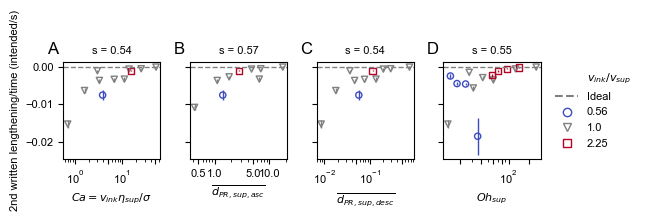

In [63]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_write2RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_write2Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\delta_wn_write2Reg.png and .svg


,variable,Spearman coeff,Spearman p
0,spacing,-0.37,9.9e-17


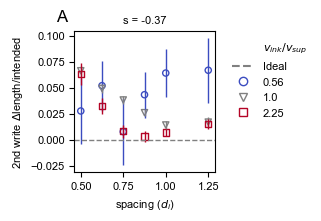

In [76]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_write2RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_write2Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\delta_wn_write2Reg.png and .svg


,variable,Spearman coeff,Spearman p
1,spacing_adj,-0.37,2.5e-02


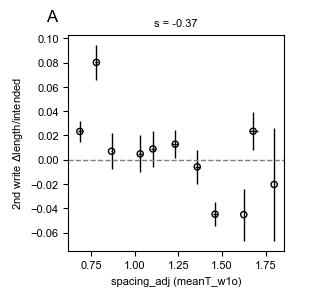

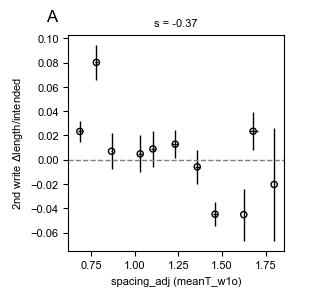

In [77]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_wn_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_d2oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_d2oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dwndt_d2oReg.png and .svg


,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,0.42,2.6e-11


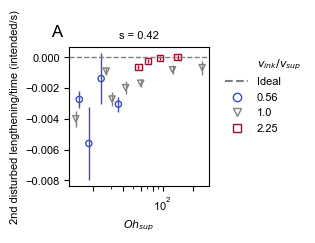

In [64]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_d2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_disturb2RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_disturb2Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\delta_wn_disturb2Reg.png and .svg


,variable,Spearman coeff,Spearman p
0,$Ca$,0.60,2.4e-24
1,$\overline{d_{PR.sup.asc}}$,0.68,2.9e-32
2,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,0.62,1.4e-25
3,$\overline{d_{PR.ink.desc}}$,0.59,3.2e-23
4,$\overline{d_{PR.sup.desc}}$,0.61,2.8e-25
5,$\overline{d_{PR.ink.desc}}\times \overline{d_...,0.63,4.9e-27
6,$Oh_{ink}\times Oh_{sup}$,0.65,6.9e-29


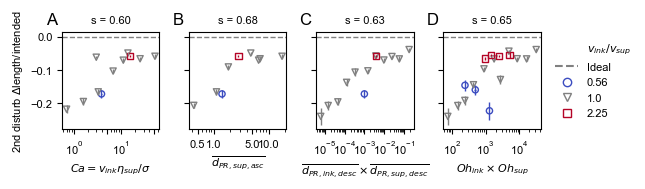

In [70]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_disturb2RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_disturb2Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\delta_wn_disturb2Reg.png and .svg


,variable,Spearman coeff,Spearman p
0,spacing,0.42,8.0e-02


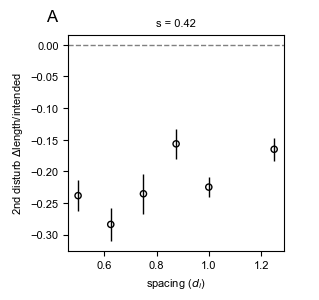

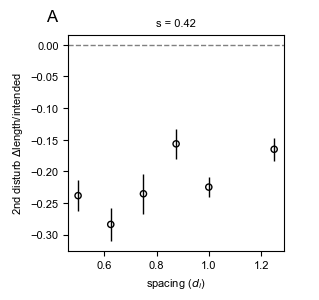

In [71]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_wn_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w3oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dwndt_w3oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dwndt_w3oReg.png and .svg


,variable,Spearman coeff,Spearman p
0,$Ca$,0.51,9.9e-18
1,$\overline{d_{PR.sup.asc}}$,0.53,4.4e-19
2,$\overline{d_{PR.sup.desc}}$,0.51,2.3e-17
3,$\overline{d_{PR.ink.desc}}\times \overline{d_...,0.51,3.1e-17
4,$Oh_{ink}\times Oh_{sup}$,0.51,1.1e-17


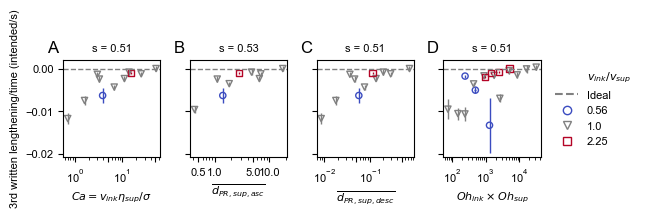

In [65]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_write3RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_wn_write3Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\delta_wn_write3Reg.png and .svg


,variable,Spearman coeff,Spearman p
0,$We_{ink}$,0.48,1.6e-15


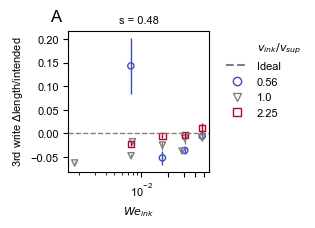

In [66]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## ldiff

,variable,Spearman coeff,Spearman p
2,zdepth,0.31,1.2e-09


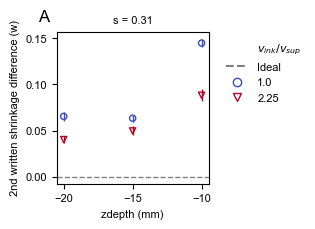

In [234]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca>15], 'ldiff_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.52,2.5e-34
1,$\overline{d_{PR.sup.asc}}$,-0.53,1.9e-35
2,$\overline{d_{PR.sup.desc}}$,-0.51,2.6e-33


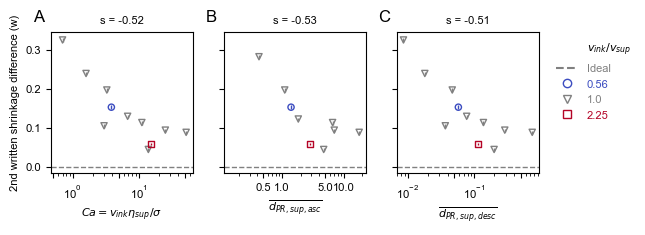

In [9]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.sup.asc}}$,-0.54,1.0e-19


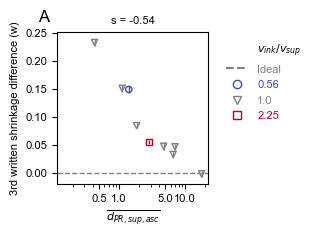

In [10]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## meanT

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dmeanTdt_w1oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dmeanTdt_w1oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dmeanTdt_w1oReg.png and .svg


,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,-0.31,4.7e-17


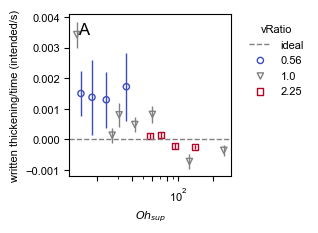

In [134]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.segments_w1o==1], 'dmeanTdt_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
rgt.df

,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,-0.65,1.8e-87
1,$Oh_{ink}/Oh_{sup}$,0.62,4.1e-75
2,$Re_{sup}$,0.73,1.1e-117
3,$Re_{ink}/Re_{sup}$,-0.68,4.5e-98
4,$\eta_{sup}$,-0.69,5.8e-101


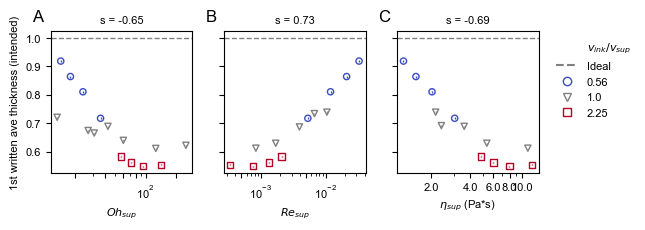

In [113]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.segments_w1o==1], 'meanT_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$\overline{d_{PR.sup.asc}}$,-0.35,3.5e-08


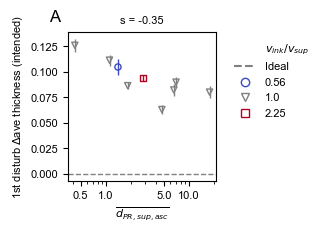

In [115]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.52,2.7e-34
1,$\overline{d_{PR.sup.asc}}$,-0.53,2.4e-35
2,$\overline{d_{PR.sup.desc}}$,-0.51,2.6e-33


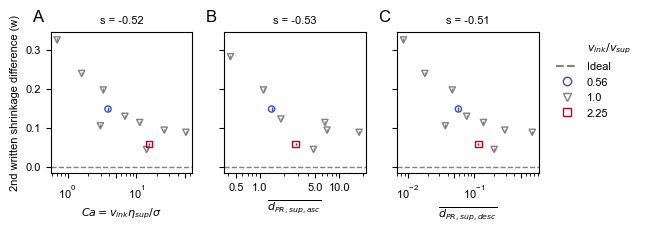

In [171]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## y0

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.63,1.6e-05
1,$\overline{d_{PR.sup.asc}}$,-0.72,1.4e-07
2,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.66,4.4e-06
3,$\overline{d_{PR.ink.desc}}$,-0.67,2.3e-06
4,$\overline{d_{PR.sup.desc}}$,-0.66,4.4e-06
5,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.67,1.9e-06
6,$Oh_{sup}$,-0.67,2.1e-06
7,$Oh_{ink}\times Oh_{sup}$,-0.74,4.1e-08
8,$Re_{ink}\times Re_{sup}$,0.58,8.2e-05
9,$\eta_{ink}\times \eta_{sup}$,-0.57,1.2e-04


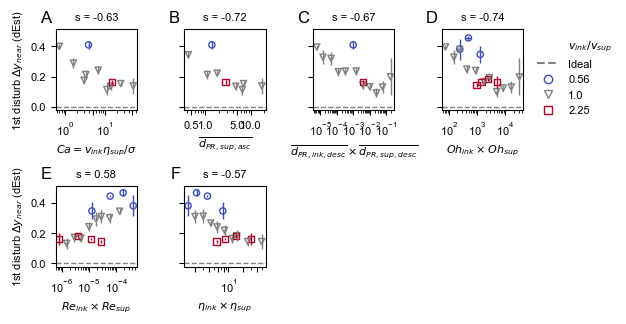

In [102]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_y0_disturb1', spacing=1.250, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

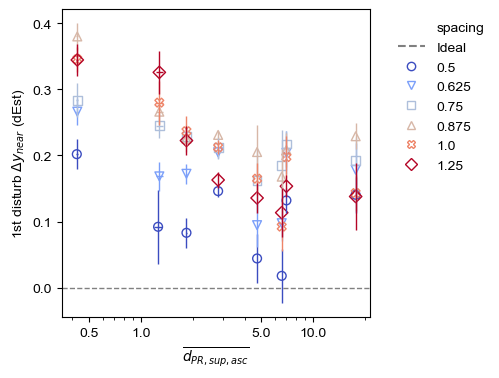

In [78]:
xvar = 'sup_dnorma'
yvar = 'delta_y0_disturb1'
cvar = 'spacing'
mvar = ''
p2 = mp.scatterPlot(ms, ms.ss, xvar=xvar, yvar=yvar, logx=True
                    , logy=False, dx=0.1, plotType='notebook', figsize=(4,4), cvar=cvar, mvar=mvar
                    , yideal=me.ideals().yideal(yvar),  legendloc='right')
p2.fig

## yc

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.54,3.0e-04
1,$Ca_{sup}$,-0.54,3.0e-04
2,$Ca_{ink}\times Ca_{sup}$,-0.56,1.5e-04
3,$\overline{d_{PR.sup.asc}}$,-0.61,3.3e-05
4,$\overline{d_{PR.sup.desc}}$,-0.61,3.3e-05
5,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.61,3.4e-05
6,$Oh_{sup}$,-0.62,1.8e-05
7,$Oh_{ink}\times Oh_{sup}$,-0.67,2.2e-06
8,$\eta_{ink}\times \eta_{sup}$,-0.53,3.8e-04


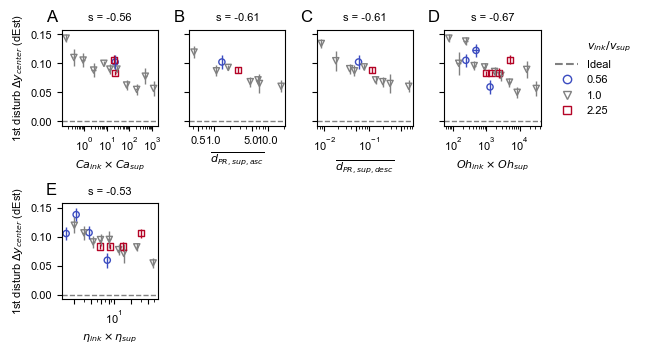

In [33]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb1', spacing=1.250, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
3,$Re_{ink}/Re_{sup}$,0.47,2.0e-03


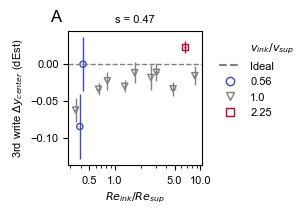

In [52]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write3', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## yf

,variable,Spearman coeff,Spearman p
0,$Ca$,0.51,1.3e-03
1,$We_{ink}$,0.61,6.1e-05


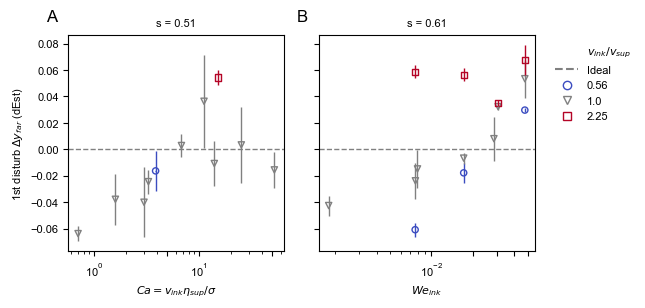

In [120]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yf_disturb1', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,-0.54,4.3e-04
1,$Ca$,-0.56,1.8e-04
2,$\overline{d_{PR.sup.asc}}$,-0.64,1.4e-05
3,$\overline{d_{PR.sup.desc}}$,-0.62,2.3e-05
4,$Oh_{sup}$,-0.75,3.3e-08
5,$Re_{sup}$,0.63,1.6e-05
6,$Re_{ink}\times Re_{sup}$,0.63,1.5e-05
7,$Bm_{sup.desc}$,-0.50,1.2e-03
8,$\eta_{sup}$,-0.60,5.2e-05
9,$\eta_{ink}\times \eta_{sup}$,-0.57,1.4e-04


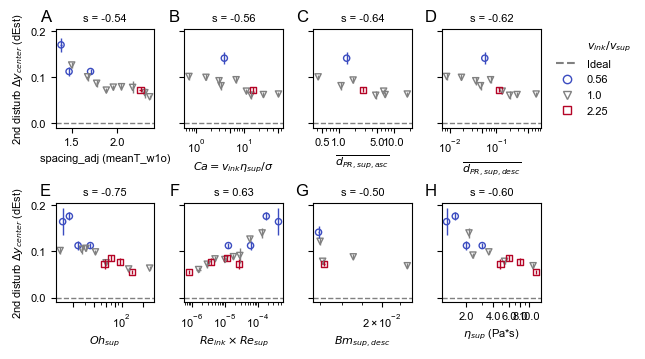

In [40]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb2', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,-0.52,1.6e-17
1,$Re_{sup}$,0.51,4.3e-17
2,$Bm_{sup.desc}$,-0.54,5.8e-19


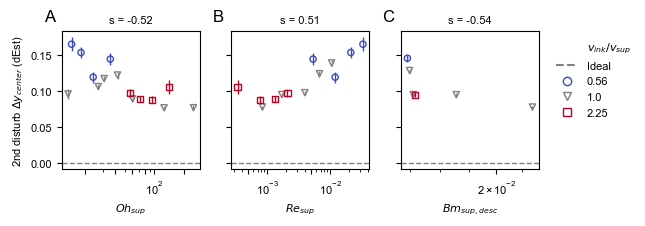

In [46]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.63,7.5e-55
1,spacing_adj,0.61,2.9e-50


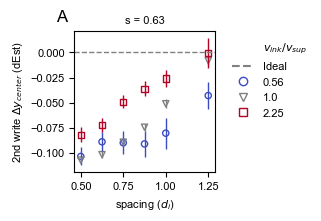

In [147]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## space_b

,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,0.57,1.1e-04
1,$Re_{sup}$,-0.54,3.1e-04
2,$Re_{ink}\times Re_{sup}$,-0.51,8.5e-04
3,$\eta_{sup}$,0.51,8.6e-04


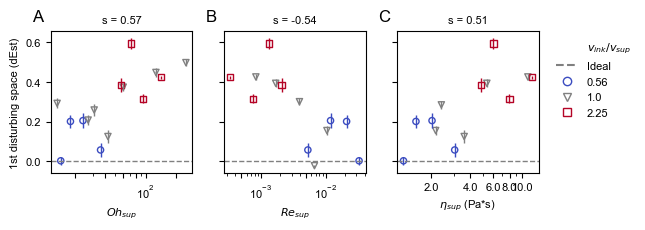

In [140]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d1p', spacing=1.25, logy=False, printOut=False,  package='pgfplot', trimVariables=True
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.79,2.3e-51


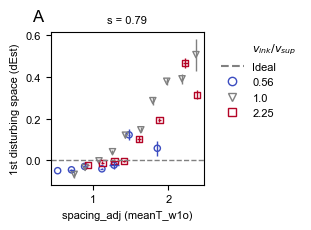

In [135]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d1p',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.77,4.3e-95


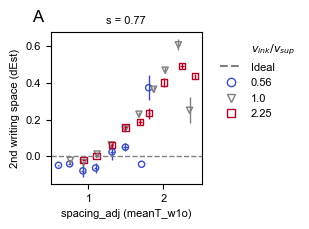

In [165]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_w2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.51,1.1e-06
1,$Oh_{sup}$,0.53,3.2e-07
2,$Re_{sup}$,-0.58,2.0e-08
3,$\eta_{sup}$,0.53,4.7e-07


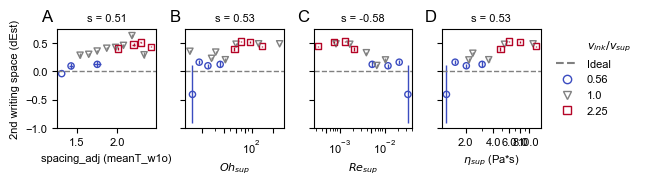

In [174]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'space_b_w2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.62,1.1e-09
1,$Ca$,0.52,9.9e-07
2,$\overline{d_{PR.sup.asc}}$,0.51,2.0e-06
3,$\overline{d_{PR.sup.desc}}$,0.52,8.9e-07
4,$Oh_{sup}$,0.70,8.1e-13
5,$Re_{sup}$,-0.68,3.7e-12
6,$\eta_{sup}$,0.66,3.2e-11
7,$\eta_{ink}\times \eta_{sup}$,0.61,2.1e-09


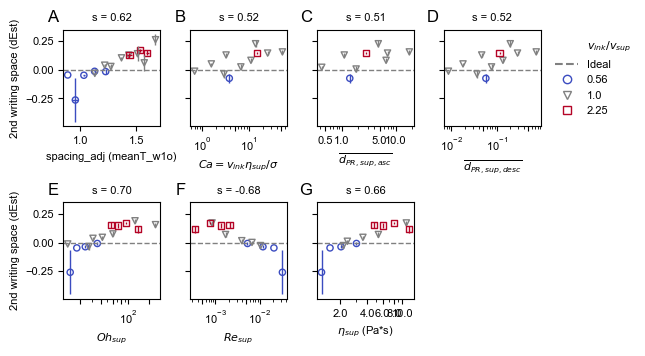

In [169]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'space_b_w2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.52,8.9e-04
1,$Oh_{sup}$,0.58,1.4e-04
2,$Re_{sup}$,-0.58,1.4e-04
3,$\eta_{sup}$,0.55,3.2e-04


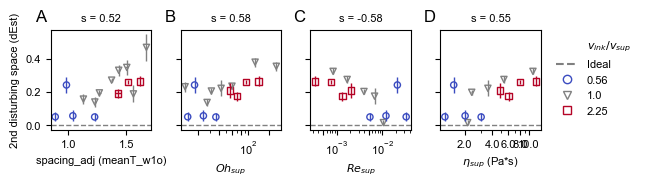

In [175]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.66,4.9e-06
1,$Oh_{sup}$,0.66,5.4e-06
2,$Oh_{ink}/Oh_{sup}$,-0.63,2.0e-05
3,$Re_{sup}$,-0.73,1.2e-07
4,$Re_{ink}/Re_{sup}$,0.66,4.9e-06
5,$\eta_{sup}$,0.71,3.3e-07


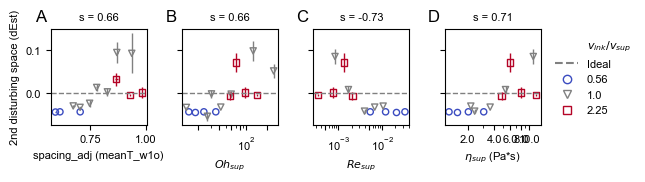

In [177]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,0.45,4.4e-03


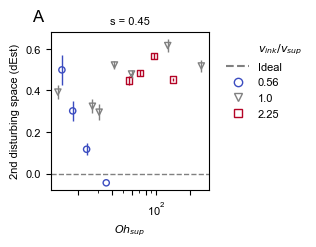

In [178]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.79,8.7e-50


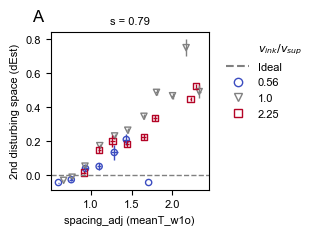

In [179]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## segments

,variable,Spearman coeff,Spearman p
3,$We_{ink}/We_{sup}$,-0.10,7.0e-03


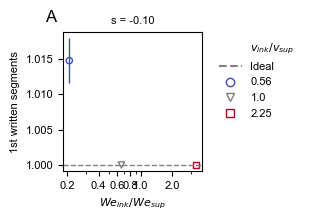

In [108]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
3,$We_{ink}/We_{sup}$,-0.24,2.4e-04


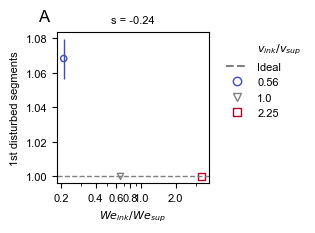

In [109]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_d1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.59,7.3e-47
1,spacing_adj,0.59,2.1e-46


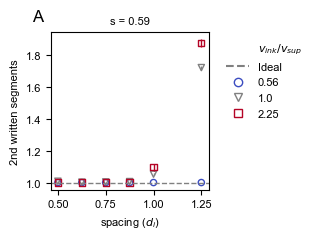

In [183]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.60,3.0e-09
1,$Oh_{sup}$,0.53,5.2e-07


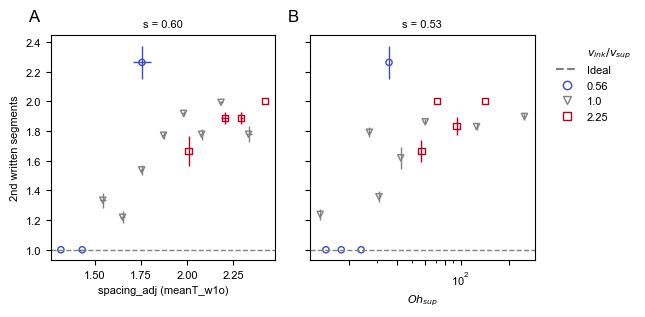

In [103]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'segments_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.53,5.6e-18


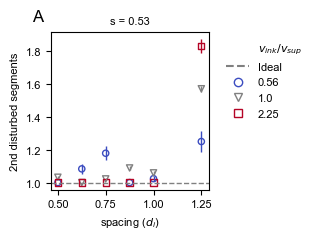

In [104]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_d2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.50,1.2e-03


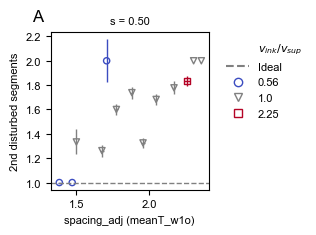

In [105]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'segments_d2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.64,3.7e-29
1,spacing_adj,0.64,4.4e-30


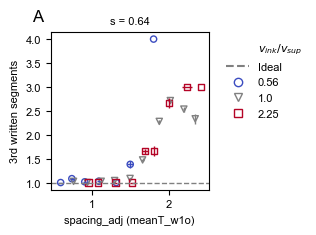

In [106]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.67,1.4e-06
1,$Oh_{sup}$,0.54,3.1e-04
2,$Oh_{ink}\times Oh_{sup}$,0.55,1.9e-04


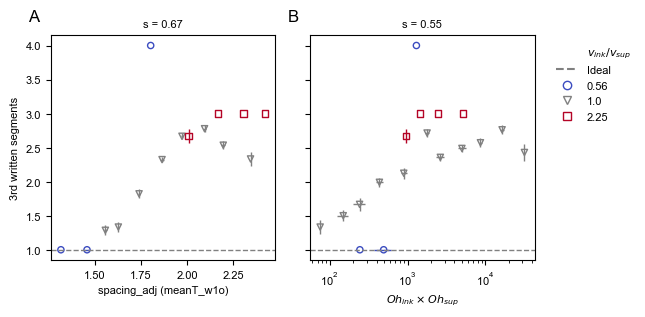

In [107]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'segments_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## emptiness

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.sup.asc}}$,-0.53,4.7e-04
1,$Oh_{sup}$,-0.54,3.3e-04
2,$Oh_{ink}\times Oh_{sup}$,-0.52,5.7e-04


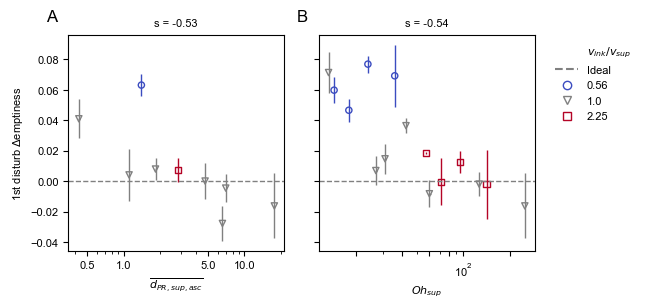

In [82]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,0.55,1.3e-07


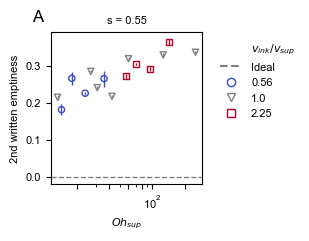

In [83]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'emptiness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,spacing_adj,0.42,1.9e-21


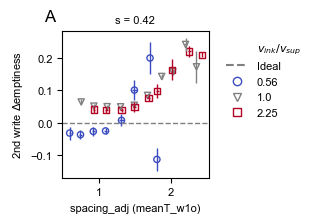

In [94]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_emptiness_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$Re_{ink}\times Re_{sup}$,0.49,1.4e-03


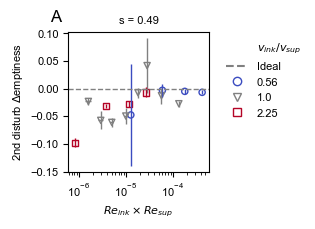

In [96]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.48,1.4e-03


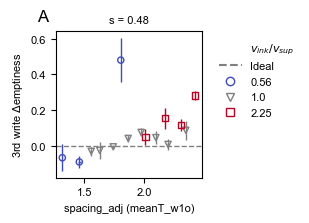

In [99]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## roughness

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.desc}}$,-0.29,6.8e-02


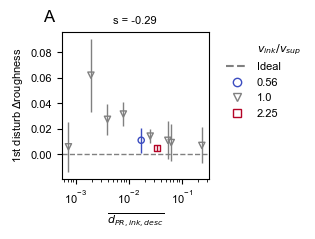

In [106]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_roughness_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.82,7.4e-115
1,spacing_adj,0.86,1.3e-142


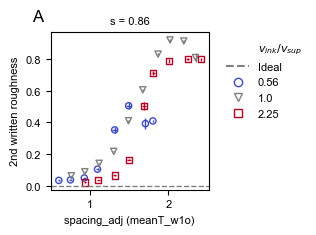

In [109]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.52,9.2e-07
1,$\overline{d_{PR.sup.asc}}$,0.52,8.8e-07
2,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.52,6.6e-07
3,$Oh_{sup}$,0.54,2.0e-07


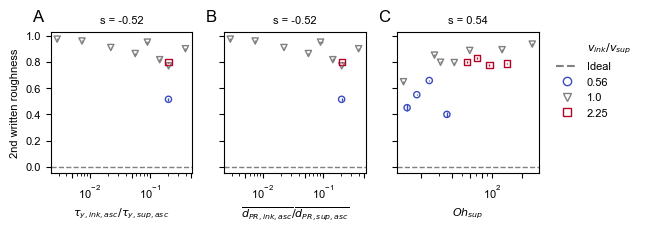

In [110]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.sup.asc}}$,0.52,6.4e-04
1,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,0.54,3.7e-04
2,$\overline{d_{PR.ink.desc}}$,0.52,6.3e-04
3,$\overline{d_{PR.ink.desc}}\times \overline{d_...,0.52,6.6e-04
4,$Oh_{ink}\times Oh_{sup}$,0.61,3.1e-05
5,$Re_{ink}\times Re_{sup}$,-0.50,1.1e-03
6,$\eta_{ink}$,0.51,9.0e-04
7,$\eta_{ink}\times \eta_{sup}$,0.52,7.3e-04


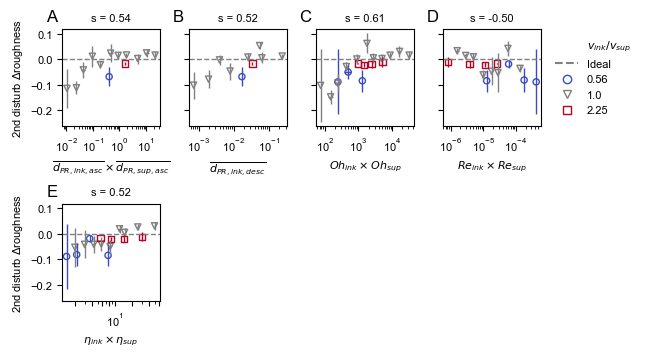

In [111]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_roughness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.84,5.0e-66
1,spacing_adj,0.88,3.0e-80


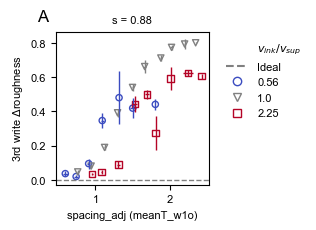

In [120]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.53,4.2e-04
1,$Oh_{ink}\times Oh_{sup}$,0.59,5.3e-05
2,$Re_{ink}$,-0.60,3.3e-05
3,$Re_{ink}\times Re_{sup}$,-0.63,9.2e-06
4,$Bm_{sup.asc}$,0.53,4.0e-04
5,$Bm_{sup.desc}$,0.62,1.4e-05
6,$\eta_{ink}\times \eta_{sup}$,0.56,1.6e-04


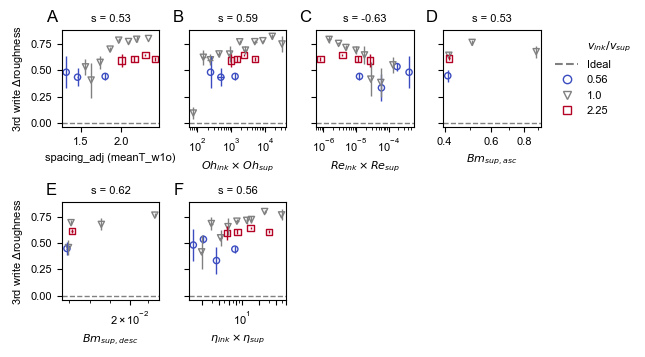

In [121]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_roughness_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
5,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.34,2.8e-02


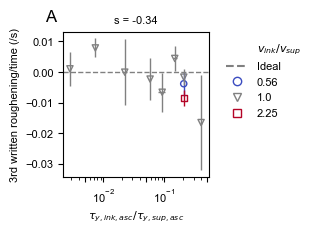

In [126]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'droughnessdt_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$\eta_{ink}\times \eta_{sup}$,0.45,2.7e-05


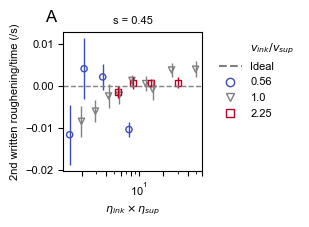

In [129]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'droughnessdt_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$Ca_{sup}$,0.19,2.2e-05


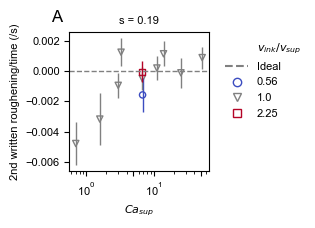

In [130]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'droughnessdt_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## dy0lr

,variable,Spearman coeff,Spearman p
0,spacing,-0.85,8.1e-06
1,spacing_adj,-0.86,4.8e-06


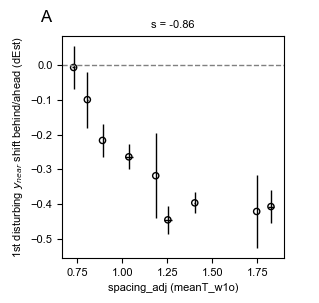

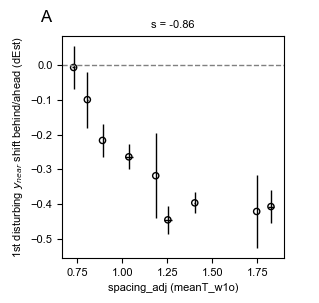

In [135]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'dy0lr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$We_{ink}/We_{sup}$,-0.51,1.0e-03


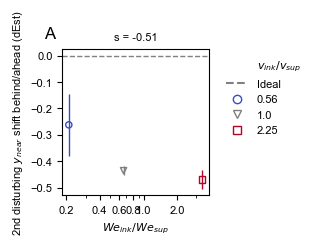

In [139]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'dy0lr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## dyflr

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.71,5.2e-37


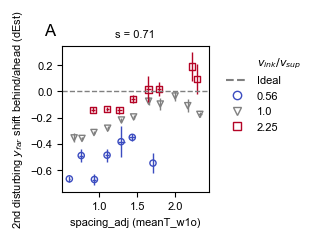

In [142]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$We_{ink}/We_{sup}$,0.58,1.0e-04
1,$Re_{sup}$,-0.54,3.5e-04
2,$Re_{ink}/Re_{sup}$,0.57,1.5e-04


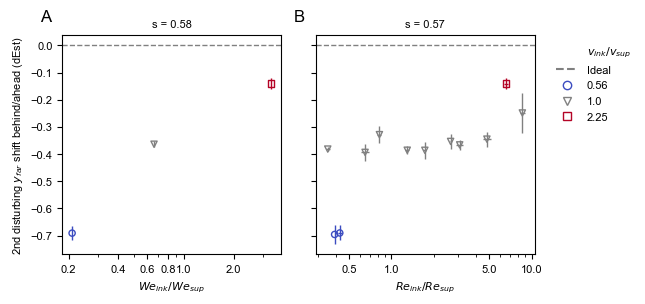

In [144]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'dyflr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.77,1.6e-04
1,spacing_adj,0.75,3.6e-04


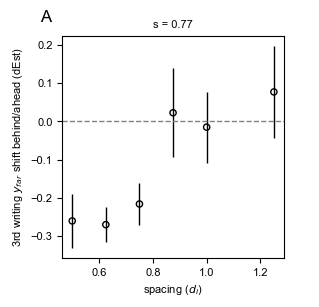

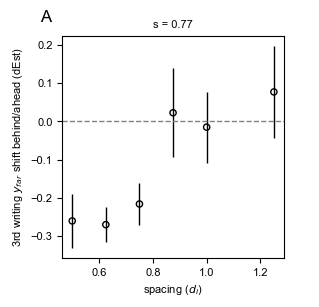

In [148]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'dyflr_w3p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.56,3.7e-21
1,spacing_adj,0.61,1.2e-26


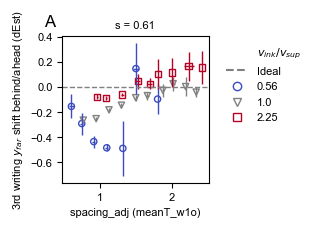

In [149]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_w3p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$We_{ink}/We_{sup}$,0.50,1.2e-31


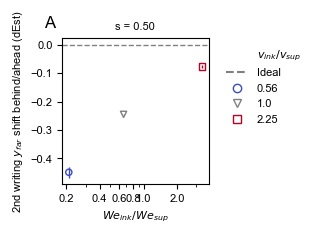

In [162]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_w2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig